# 수익성 분석

## 데이터 불러오기, 전처리, EDA

### 데이터
- 역별 데이터
- 2016년 ~ 2022년 10월
- 일평균승하차 : 역별 일평균승하차
- 업장수 : 10인 이하 업체
- 일평균(원) : 역별 일평균 운수 수익

In [72]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

In [73]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

In [74]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [75]:
df = pd.read_csv("./2016~2022_일평균 승하차,운수수익.csv", encoding="euc-kr")
df

,역사명,연도,일평균 승하차,일평균 운수수익
0,가야,2016,7289.0,2579454
1,감전,2016,7626.0,3395089
2,강서구청,2016,5600.0,2717454
3,개금,2016,16331.0,6317217
4,거제,2016,9650.0,4150958
...,...,...,...,...
688,충렬사,2022,5719.0,1056843
689,토성,2022,15118.0,5678334
690,하단,2022,32746.0,10415912
691,해운대,2022,23072.0,8352193


### 결측치 채워넣기

In [76]:
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     6
일평균 운수수익    0
dtype: int64

In [77]:
df = df.fillna(0)
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     0
일평균 운수수익    0
dtype: int64

In [78]:
df.iloc[124]["일평균 승하차"]

11170.0

In [79]:
# 다대포해수욕장은 증가/감소 추세가 섞여 있어서 2017년 값을 대입
df.iat[25,2] = 11170.0
df.iat[25,2]

11170.0

낫개, 다대포항, 동매, 신장림, 장림역은 증가 추세가 보이므로 가격 차이만큼 역산하여 넣기

In [80]:
# 낫개역
df.iat[21,2] = 9122
df.iat[21,2]

9122.0

In [81]:
# 다대포항
df.iat[24,2] = 6886
df.iat[24,2]

6886.0

In [82]:
# 동매
df.iat[34,2] = 5434
df.iat[34,2]

5434.0

In [83]:
# 신장림
df.iat[74,2] = 5725
df.iat[74,2]

5725.0

In [84]:
# 장림
df.iat[82,2] = 4590
df.iat[82,2]

4590.0

In [85]:
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     0
일평균 운수수익    0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   역사명       693 non-null    object 
 1   연도        693 non-null    int64  
 2   일평균 승하차   693 non-null    float64
 3   일평균 운수수익  693 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 21.8+ KB


In [87]:
df['일평균 승하차'] = df[['일평균 승하차']].astype(int)

### 산점도

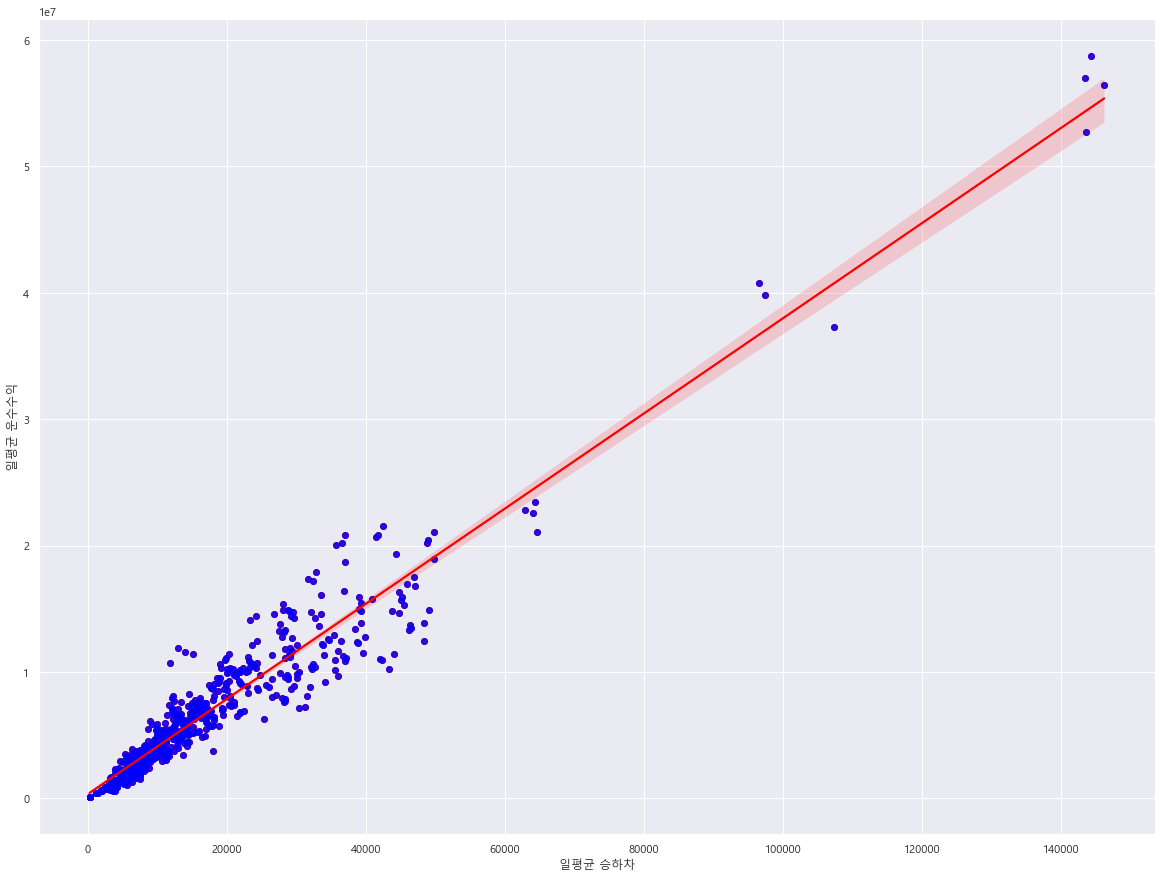

In [88]:
plt.figure(figsize=(20,15))
sns.regplot(x='일평균 승하차', y='일평균 운수수익', data=df, color="red")
plt.scatter(df[['일평균 승하차']], df[['일평균 운수수익']], alpha=0.8, color='blue')
plt.show()

## 선정된 21개의 역의 수익 추이 분석

In [89]:
rank = pd.read_csv("./종합_점수_계산_가중치_x (2).csv", index_col=0, encoding="euc-kr")
rank

,역사명,동별,역위도,역경도,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,일평균승하차 레벨,업장수 레벨,1인 가구수 레벨,20~40대 인구 수 레벨,고속버스 터미널,환승,기차역,여객 터미널,주변 관광지,주변 대학교,종합점수
0,사상,괘법동,35.162361,128.984621,6.0,0.0,209.0,0.0,99,89,100,95,1.0,0.0,1.0,0.0,0,1,103.50
1,부전,부전1동,35.162587,129.062952,3.0,2.0,101.0,70.0,93,92,94,72,0.0,0.0,1.0,0.0,4,1,95.25
2,미남,온천3동,35.205503,129.068061,11.0,0.0,952.0,0.0,73,95,94,99,0.0,1.0,0.0,0.0,0,0,92.75
3,전포,전포1동,35.153102,129.065374,33.0,11.0,1151.0,422.0,71,88,93,98,0.0,0.0,0.0,0.0,2,1,92.50
4,온천장,온천1동,35.220249,129.086437,10.0,0.0,367.0,0.0,88,67,91,88,0.0,0.0,0.0,0.0,0,1,86.00
5,서면,부전2동,35.158282,129.059556,3.0,1.0,130.0,26.0,100,100,61,50,0.0,1.0,0.0,0.0,4,1,85.25
6,센텀시티,우2동,35.168827,129.131745,5.0,0.0,178.0,0.0,95,94,43,84,0.0,0.0,1.0,0.0,1,0,84.00
7,연산,연산4동,35.186168,129.081534,10.0,1.0,286.0,30.0,97,99,69,47,0.0,1.0,0.0,0.0,0,1,83.00
8,하단,하단1동,35.106180,128.966803,5.0,0.0,166.0,0.0,96,72,78,75,0.0,0.0,0.0,0.0,0,1,82.75
9,부산대,장전2동,35.229609,129.089358,6.0,1.0,434.0,30.0,86,81,69,79,0.0,0.0,0.0,0.0,0,1,81.25


In [90]:
# 입지분석 결과 상위 21개역만 추출
rank = rank.iloc[0:22]
rank

,역사명,동별,역위도,역경도,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,일평균승하차 레벨,업장수 레벨,1인 가구수 레벨,20~40대 인구 수 레벨,고속버스 터미널,환승,기차역,여객 터미널,주변 관광지,주변 대학교,종합점수
0,사상,괘법동,35.162361,128.984621,6.0,0.0,209.0,0.0,99,89,100,95,1.0,0.0,1.0,0.0,0,1,103.50
1,부전,부전1동,35.162587,129.062952,3.0,2.0,101.0,70.0,93,92,94,72,0.0,0.0,1.0,0.0,4,1,95.25
2,미남,온천3동,35.205503,129.068061,11.0,0.0,952.0,0.0,73,95,94,99,0.0,1.0,0.0,0.0,0,0,92.75
3,전포,전포1동,35.153102,129.065374,33.0,11.0,1151.0,422.0,71,88,93,98,0.0,0.0,0.0,0.0,2,1,92.50
4,온천장,온천1동,35.220249,129.086437,10.0,0.0,367.0,0.0,88,67,91,88,0.0,0.0,0.0,0.0,0,1,86.00
5,서면,부전2동,35.158282,129.059556,3.0,1.0,130.0,26.0,100,100,61,50,0.0,1.0,0.0,0.0,4,1,85.25
6,센텀시티,우2동,35.168827,129.131745,5.0,0.0,178.0,0.0,95,94,43,84,0.0,0.0,1.0,0.0,1,0,84.00
7,연산,연산4동,35.186168,129.081534,10.0,1.0,286.0,30.0,97,99,69,47,0.0,1.0,0.0,0.0,0,1,83.00
8,하단,하단1동,35.106180,128.966803,5.0,0.0,166.0,0.0,96,72,78,75,0.0,0.0,0.0,0.0,0,1,82.75
9,부산대,장전2동,35.229609,129.089358,6.0,1.0,434.0,30.0,86,81,69,79,0.0,0.0,0.0,0.0,0,1,81.25


In [99]:
rank_name = list(rank["역사명"])
rank_name

['사상',
 '부전',
 '미남',
 '전포',
 '온천장',
 '서면',
 '센텀시티',
 '연산',
 '하단',
 '부산대',
 '장전',
 '명륜',
 '해운대',
 '중동',
 '범내골',
 '동래',
 '다대포해수욕장',
 '벡스코',
 '광안',
 '다대포항',
 '수영',
 '민락']

In [116]:
df[["역사명"]]

,역사명
0,가야
1,감전
2,강서구청
3,개금
4,거제
...,...
688,충렬사
689,토성
690,하단
691,해운대
